# Projet MLOps — Prédiction du prix des maisons

**Objectif :** Construire un pipeline complet de Data Science pour prédire le prix d’une maison.

On réalise les étapes suivantes :

- **Collecte des données**
- **Nettoyage**
- **Feature Engineering**
- **Modélisation**
- **Évaluation**



In [67]:
import os
import pandas as pd
import numpy as np


## 1. Collecte des données

On récupère le dataset depuis une source publique csv

In [68]:
os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("models", exist_ok=True)


In [69]:
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()


(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


On conserve une version brute, utile pour la reproductibilité du projet.

In [70]:
df.to_csv("data/raw/housing_raw.csv", index=False)

### Analyses graphiques : 

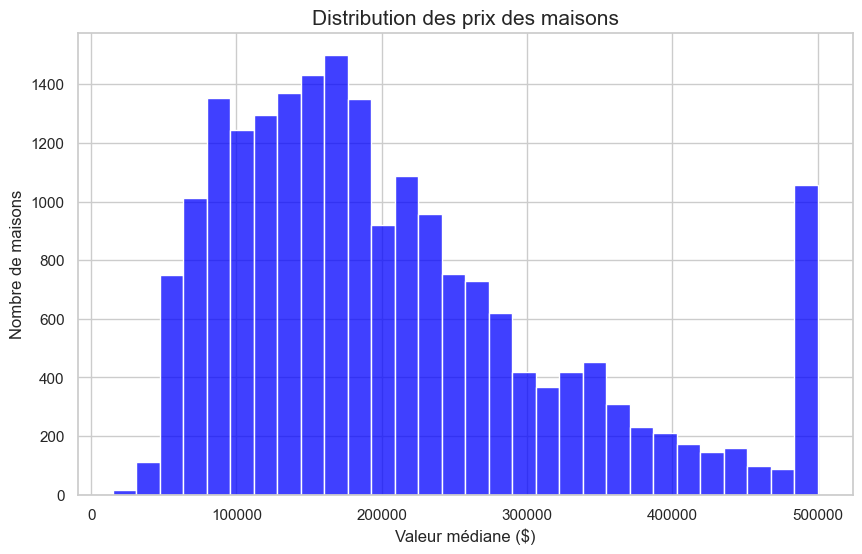

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['median_house_value'], kde=False, color='blue', bins=30)

plt.title('Distribution des prix des maisons', fontsize=15)
plt.xlabel('Valeur médiane ($)', fontsize=12)
plt.ylabel('Nombre de maisons', fontsize=12)

plt.show()

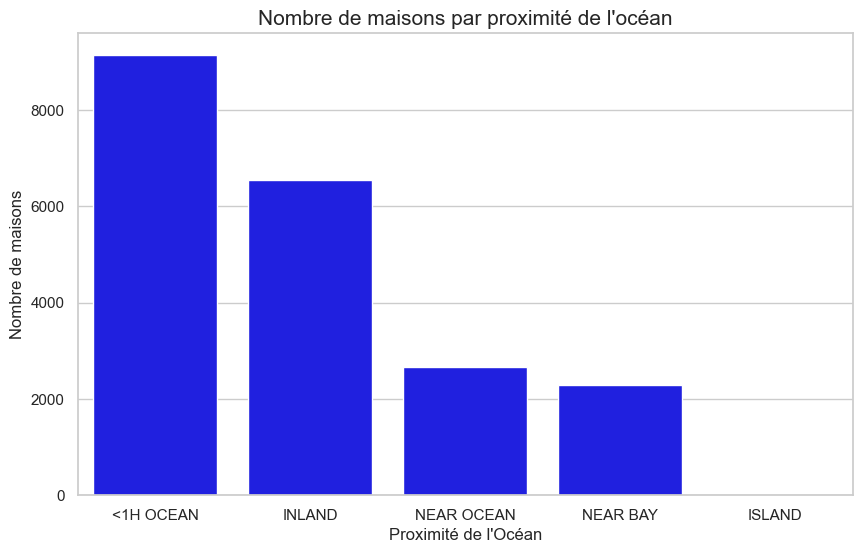

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

ordre_decroissant = df['ocean_proximity'].value_counts(ascending=False).index

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

sns.countplot(
    data=df, 
    x='ocean_proximity', 
    order=ordre_decroissant, 
    color='blue'
)

plt.title('Nombre de maisons par proximité de l\'océan', fontsize=15)
plt.xlabel('Proximité de l\'Océan', fontsize=12)
plt.ylabel('Nombre de maisons', fontsize=12)

plt.show()

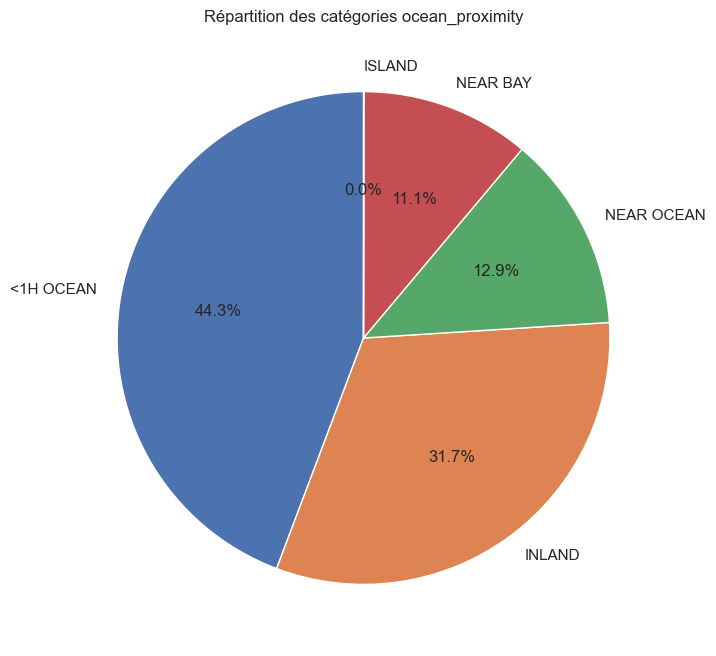

In [73]:
import matplotlib.pyplot as plt

data_pie = df['ocean_proximity'].value_counts()

plt.figure(figsize=(8, 8))

plt.pie(
    data_pie, 
    labels=data_pie.index, 
    autopct='%1.1f%%', 
    startangle=90
)

plt.title('Répartition des catégories ocean_proximity')
plt.show()

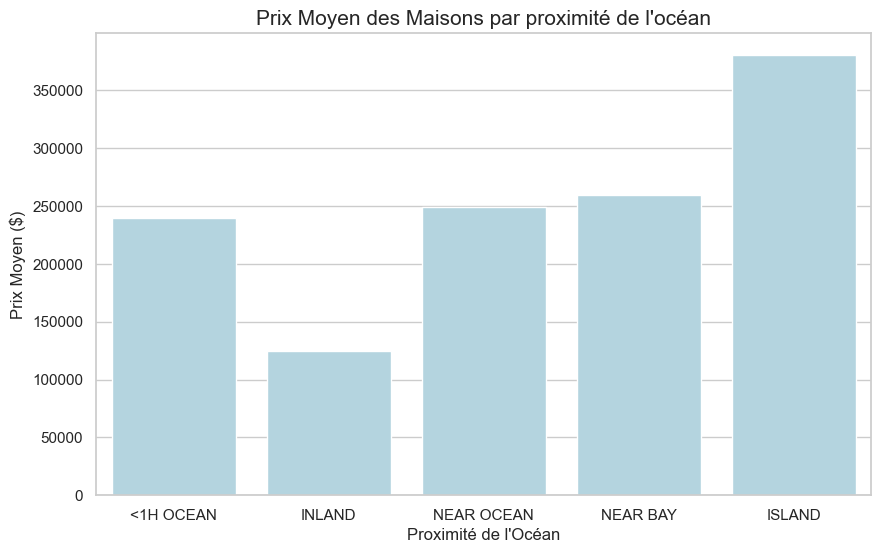

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

ordre_croissant = df['ocean_proximity'].value_counts(ascending=False).index
sns.barplot(
    data=df, 
    order=ordre_croissant,
    x='ocean_proximity', 
    y='median_house_value', 
    color ='lightblue',
    errorbar=None
)

plt.title('Prix Moyen des Maisons par proximité de l\'océan', fontsize=15)
plt.xlabel('Proximité de l\'Océan', fontsize=12)
plt.ylabel('Prix Moyen ($)', fontsize=12)

plt.show()

## 2. Nettoyage des données

On va :

- vérifier les valeurs manquantes
- séparer la variable à prédire
- faire un train/test split
- sauvegarder les données nettoyées


In [75]:
import pandas as pd

df = pd.read_csv("data/raw/housing_raw.csv")
print(df.shape)
df.head()


(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Traitement des valeurs manquantes


In [76]:
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


total_bedrooms    207
dtype: int64

###  Séparation des variables explicatives et de la cible

- variable cible (**y**): **`median_house_value`**
- variables explicatives (**X**) : toutes les autres colonnes


In [77]:
X = df.drop(columns=["median_house_value"])
y = df["median_house_value"]

print(X.shape)
print(y.shape)


(20640, 9)
(20640,)


###  Séparation Train / Test

- **train** entraîne le modèle (80%)
- **test** évalue la performance sur des données jamais vues (20%)

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train:", X_train.shape, y_train.shape)
print("Test :", X_test.shape, y_test.shape)


Train: (16512, 9) (16512,)
Test : (4128, 9) (4128,)


###  Sauvegarde des données préparées


In [79]:
import os

os.makedirs("data/processed", exist_ok=True)

X_train.to_csv("data/processed/X_train.csv", index=False)
X_test.to_csv("data/processed/X_test.csv", index=False)
y_train.to_csv("data/processed/y_train.csv", index=False)
y_test.to_csv("data/processed/y_test.csv", index=False)


## 3.  Feature Engineering

Le dataset contient :

- des colonnes numériques (ex: median_income, housing_median_age, etc.)
- une colonne catégorielle : ocean_proximity

Les actions à mener : 

- remplacement les valeurs manquantes
- encodage de ocean_proximity
- standardisation les variables numériques

Pour éviter les erreurs, on fait tout ça avec un **Pipeline**.


In [80]:
import pandas as pd

X_train = pd.read_csv("data/processed/X_train.csv")
X_test = pd.read_csv("data/processed/X_test.csv")
y_train = pd.read_csv("data/processed/y_train.csv").squeeze()
y_test = pd.read_csv("data/processed/y_test.csv").squeeze()

print(X_train.shape, X_test.shape)
X_train.head()


(16512, 9) (4128, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
1,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
2,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
3,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
4,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


### Pipeline de transformation

L’idée c’est de préparer les données de la même façon pour le train et le test.

- **numériques** → remplissage des valeurs manquantes + standardisation
- **catégorielles** → encodage *OneHot*

Ça évite de faire des transformations “à la main” et ça rend le projet plus propre.


In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_features = X_train.drop(columns=["ocean_proximity"]).columns
cat_features = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])


### Transformation des données

On applique le pipeline :

- `fit_transform` sur le train (apprendre + transformer)
- `transform` sur le test (juste transformer)


In [82]:
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

print("X_train : ", X_train_prepared.shape)
print("X_test : ", X_test_prepared.shape)


X_train :  (16512, 13)
X_test :  (4128, 13)


### Sauvegarde


In [83]:
import joblib
import os

os.makedirs("models", exist_ok=True)

joblib.dump(preprocessor, "models/preprocessor.joblib")


['models/preprocessor.joblib']

## 4. Entraînement du modèle

Maintenant que les données sont prêtes, on peut entraîner un modèle.

On commence avec un Random Forest, parce qu’il ne demande pas trop de réglages au début. L’idée c’est d’avoir un premier modèle fonctionnel, puis on regardera les performances.


In [84]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train_prepared, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

### Sauvegarde du modèle

On sauvegarde le modèle entraîné dans le dossier models/ qui servira plus tard pour l'évaluation, prédictions, ...


In [85]:
import joblib

joblib.dump(model, "models/model.joblib")


['models/model.joblib']

### Vérification rapide

On fait une première prédiction sur le *test* juste pour voir si tout fonctionne bien.


In [86]:
y_pred = model.predict(X_test_prepared)

print("Prédictions :", y_pred[:5])
print("Valeurs réelles :", y_test.values[:5])


Prédictions : [ 50921.   70244.5 464703.4 258147.5 267298. ]
Valeurs réelles : [ 47700.  45800. 500001. 218600. 278000.]


## 5. Évaluation du modèle

On mesure la performance du modèle sur le jeu de test.


In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE  : {mae:,.2f}")
print(f"RMSE : {rmse:,.2f}")


MAE  : 31,465.25
RMSE : 48,781.91


### Sauvegarde des résultats

In [88]:
import json
import os

os.makedirs("report", exist_ok=True)

results = {
    "model": "RandomForestRegressor",
    "mae": float(mae),
    "rmse": float(rmse)
}

with open("report/metrics.json", "w") as f:
    json.dump(results, f, indent=4)


# Interprétation des variables 

In [89]:
import pandas as pd
import os
import joblib


os.makedirs("report/all_features", exist_ok=True)

num_cols = list(num_features)
cat_cols = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)
all_features_names = num_cols + list(cat_cols)


importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_features_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


feature_importance_df.to_csv("report/all_features/feature_importance.csv", index=False)

### Conclusion rapide

Le modèle est entraîné et évalué avec succès 
On a maintenant un pipeline complet qui va :

1. récupérer les données
2. préparer les données
3. transformer les features
4. entraîner un modèle
5. mesurer la performance

La prochaine étape (pour rendre ça encore plus propre) sera de transformer ce notebook en **jobs Python** comme demandé dans la consigne.


# Jobs

On transforme le notebook en jobs.

Chaque job correspond à une étape du pipeline :

1. `01_collect.py` → collecte des données  
2. `02_clean.py` → nettoyage + split train/test  
3. `03_features.py` → transformations (encodage + scaling)  
4. `04_train.py` → entraînement du modèle  
5. `05_evaluate.py` → évaluation + sauvegarde des métriques  


In [90]:
import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)
os.makedirs("models", exist_ok=True)
os.makedirs("report", exist_ok=True)
os.makedirs("jobs", exist_ok=True)


## Job 01 — Collecte des données


In [91]:
code = """
import os
import pandas as pd

def main():
    os.makedirs("data/raw", exist_ok=True)

    url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
    df = pd.read_csv(url)

    print("Dataset shape:", df.shape)

    df.to_csv("data/raw/housing_raw.csv", index=False)

if __name__ == "__main__":
    main()
"""

with open("jobs/01_collect.py", "w", encoding="utf-8") as f:
    f.write(code)


## Job 02 — Nettoyage + Train/Test split


In [92]:
code = """
import os
import pandas as pd
from sklearn.model_selection import train_test_split

def main():
    os.makedirs("data/processed", exist_ok=True)

    df = pd.read_csv("data/raw/housing_raw.csv")

    X = df.drop(columns=["median_house_value"])
    y = df["median_house_value"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42
    )

    X_train.to_csv("data/processed/X_train.csv", index=False)
    X_test.to_csv("data/processed/X_test.csv", index=False)
    y_train.to_csv("data/processed/y_train.csv", index=False)
    y_test.to_csv("data/processed/y_test.csv", index=False)

if __name__ == "__main__":
    main()
"""

with open("jobs/02_clean.py", "w", encoding="utf-8") as f:
    f.write(code)


## Job 03 — Feature Engineering


In [93]:
code = """
import os
import pandas as pd
import joblib

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

def main():
    os.makedirs("models", exist_ok=True)

    X_train = pd.read_csv("data/processed/X_train.csv")
    X_test = pd.read_csv("data/processed/X_test.csv")

    num_features = X_train.drop(columns=["ocean_proximity"]).columns
    cat_features = ["ocean_proximity"]

    num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer([
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features)
    ])

    # fit sur train uniquement
    preprocessor.fit(X_train)

    joblib.dump(preprocessor, "models/preprocessor.joblib")
if __name__ == "__main__":
    main()
"""

with open("jobs/03_features.py", "w", encoding="utf-8") as f:
    f.write(code)

## Job 04 — Entraînement du modèle

In [94]:
code = """
import os
import pandas as pd
import joblib

from sklearn.ensemble import RandomForestRegressor

def main():
    os.makedirs("models", exist_ok=True)

    # load data
    X_train = pd.read_csv("data/processed/X_train.csv")
    y_train = pd.read_csv("data/processed/y_train.csv").squeeze()

    # load preprocessor
    preprocessor = joblib.load("models/preprocessor.joblib")

    # transform
    X_train_prepared = preprocessor.transform(X_train)

    # train model
    model = RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train_prepared, y_train)

    joblib.dump(model, "models/model.joblib")

if __name__ == "__main__":
    main()
"""

with open("jobs/04_train.py", "w", encoding="utf-8") as f:
    f.write(code)


## Job 05 — Évaluation


In [95]:
code = """
import os
import json
import numpy as np
import pandas as pd
import joblib

from sklearn.metrics import mean_absolute_error, mean_squared_error

def main():
    os.makedirs("report", exist_ok=True)

    # load data
    X_test = pd.read_csv("data/processed/X_test.csv")
    y_test = pd.read_csv("data/processed/y_test.csv").squeeze()

    # load preprocessor + model
    preprocessor = joblib.load("models/preprocessor.joblib")
    model = joblib.load("models/model.joblib")

    # transform + predict
    X_test_prepared = preprocessor.transform(X_test)
    y_pred = model.predict(X_test_prepared)

    # metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"MAE  : {mae:,.2f}")
    print(f"RMSE : {rmse:,.2f}")

    results = {
        "model": "RandomForestRegressor",
        "mae": float(mae),
        "rmse": float(rmse)
    }

    with open("report/metrics.json", "w") as f:
        json.dump(results, f, indent=4)

if __name__ == "__main__":
    main()
"""

with open("jobs/05_evaluate.py", "w", encoding="utf-8") as f:
    f.write(code)
